In [2]:
import dip
import unidip
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
def ecdf(x):
    """ Return CDF of array """
    return np.arange(len(x))/float(len(x))

In [4]:
def plot_ecdf(a):
    """ Return plot of CDF by sorted xvals """
    import matplotlib.pyplot as plt 
    sorted_ = np.sort(a)
    yvals = np.arange(len(sorted_))/float(len(sorted_))
    return plt.plot(sorted_, yvals)

(0.063370842286304352, 0.000999000999000999, (-0.43058302883488064, 0.51005858449486474))


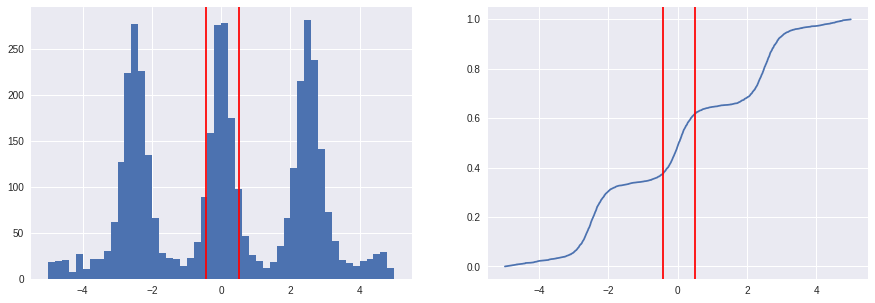

In [11]:
noise = np.random.uniform(size=1000, low=-5, high=5)
peaks = np.random.normal(size=1000, loc=0, scale=0.3)
dat = np.concatenate((noise, peaks, peaks-2.5, peaks+2.5))

results  = dip.diptst(dat, 1000)
print(results)

plt.figure(1, figsize=[15, 5])
plt.subplot(121)
plt.hist(dat, bins=50)
plt.axvline(x=results[2][0], color='red')
plt.axvline(x=results[2][1], color='red')
plt.subplot(122)
plt.plot(sorted(dat), ecdf(dat))
plt.axvline(x=results[2][0], color='red')
plt.axvline(x=results[2][1], color='red')
plt.show()

In [6]:
results

(0.066220932467679849,
 0.000999000999000999,
 (-0.49126963050303285, 0.51130815514920358))

In [12]:
dip.diptst(dat, 1000)

(0.063370842286304352,
 0.000999000999000999,
 (-0.43058302883488064, 0.51005858449486474))

In [13]:
print(len(dat))
unidip.unidip(dat)

4000


{(-2.7074376574624877, -2.3272828370189491),
 (-2.3217824910757661, -2.0871803840793839),
 (-2.0824589438429442, -1.7448581478540071),
 (-0.84989893350105916, -0.43058302883488064),
 (-0.43058302883488064, 0.51005858449486474),
 (1.9094804854137433, 3.1415228491487888)}

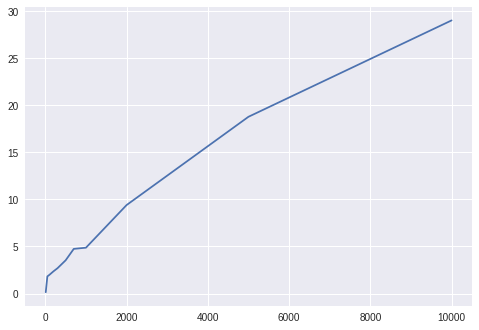

In [18]:
def time_func(ssizes):
    from time import time
    
    dtms = []
    for s in ssizes:
        peaks = np.random.normal(size=int(s/3), loc=0, scale=0.3)
        dat = np.concatenate((peaks, peaks-2.5, peaks+2.5))
        start = time()
        intervals = unidip.unidip(dat)
        end = time()
        dtms.append(end-start)
    plt.plot(ssizes, dtms)
    plt.show()   
    
time_func([10, 50, 100, 200, 300, 500, 700, 1000, 2000, 5000, 10000])

In [ ]:
peak = np.genfromtxt("tests/peaks1.csv", delimiter=",")
peaks = np.genfromtxt("tests/peaks3.csv", delimiter=",")

results  = dip.diptst(peaks, 100)
print(results)

plt.figure(1, figsize=[15, 5])
plt.subplot(121)
plt.hist(peaks, bins=50)
plt.axvline(x=results[2], color='red')
plt.axvline(x=results[3], color='red')
plt.subplot(122)
plt.plot(sorted(peaks), ecdf(peaks))
plt.axvline(x=results[2], color='red')
plt.axvline(x=results[3], color='red')
plt.show()

In [13]:
np.savetxt("large3.csv", dat, delimiter=",")